In [1]:
import numpy as np
import pandas as pd

In [2]:
file_path = "Bird_Monitoring_Data_FOREST.XLSX"
excel_data = pd.ExcelFile(file_path)
sheet_names = excel_data.sheet_names
sheets_dict = {sheet: excel_data.parse(sheet) for sheet in sheet_names}

In [3]:
combined_forest_df = pd.concat(
    [df.assign(Sheet=sheet_name) for sheet_name, df in sheets_dict.items()],
    ignore_index=True
)

In [4]:
combined_forest_df = combined_forest_df.drop(columns=['Sheet'])

In [8]:
combined_forest_df.head()

,Admin_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt
0,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,83803,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
1,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,90935,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
2,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,84865,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
3,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,93634,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
4,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,88394,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False


In [ ]:
combined_forest_df.drop(columns=['Sub_Unit_Code'], inplace=True)

In [17]:
combined_forest_df.isna().sum()


Admin_Unit_Code                0
Site_Name                      0
Plot_Name                      0
Location_Type                  0
Year                           0
Date                           0
Start_Time                     0
End_Time                       0
Observer                       0
Visit                          0
Interval_Length                0
ID_Method                      0
Distance                       0
Flyover_Observed               0
Common_Name                    0
Scientific_Name                0
AcceptedTSN                    9
NPSTaxonCode                   0
AOU_Code                       0
PIF_Watchlist_Status           0
Regional_Stewardship_Status    0
Temperature                    0
Humidity                       0
Sky                            0
Wind                           0
Disturbance                    0
Initial_Three_Min_Cnt          0
dtype: int64

In [12]:
combined_forest_df.drop(columns=['Sex'], inplace=True)

In [14]:
mode_value = combined_forest_df['Distance'].mode()[0]
combined_forest_df['Distance'].fillna(mode_value, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_3556\3505568882.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_forest_df['Distance'].fillna(mode_value, inplace=True)


In [16]:
combined_forest_df["ID_Method"].fillna("Singing",inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_3556\2164652149.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_forest_df["ID_Method"].fillna("Singing",inplace=True)


In [18]:
combined_forest_df[combined_forest_df['AcceptedTSN'].isna()]

,Admin_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt
165,ANTI,ANTI 1,ANTI-0025,Forest,2018,2018-06-25,05:40:00,05:50:00,Kimberly Serno,2,...,926917,HOFI,False,False,22.900000,68.099998,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False
635,CATO,CATO 2,CATO-0153,Forest,2018,2018-05-25,07:47:00,07:57:00,Brian Swimelar,1,...,926917,HOFI,False,False,17.799999,72.099998,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,No effect on count,False
638,CATO,CATO 2,CATO-0153,Forest,2018,2018-05-25,07:47:00,07:57:00,Brian Swimelar,1,...,926917,HOFI,False,False,17.799999,72.099998,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,No effect on count,False
1337,CHOH,CHOH 7,CHOH-0002,Forest,2018,2018-05-20,06:36:00,06:46:00,Elizabeth Oswald,1,...,926917,HOFI,False,False,18.400000,83.099998,Cloudy/Overcast,Light air movement (1-3 mph) smoke drifts,No effect on count,False
3708,GWMP,GWMP 5,GWMP-0200,Forest,2018,2018-06-30,08:14:00,08:24:00,Brian Swimelar,2,...,926917,HOFI,False,False,25.200001,73.599998,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Serious effect on count,False
3912,HAFE,HAFE 2,HAFE-0083,Forest,2018,2018-06-01,08:25:00,08:35:00,Brian Swimelar,1,...,926917,HOFI,False,False,20.299999,82.199997,Fog,Light air movement (1-3 mph) smoke drifts,No effect on count,False
3920,HAFE,HAFE 2,HAFE-0083,Forest,2018,2018-06-01,08:25:00,08:35:00,Brian Swimelar,1,...,926917,HOFI,False,False,20.299999,82.199997,Fog,Light air movement (1-3 mph) smoke drifts,No effect on count,False
3921,HAFE,HAFE 2,HAFE-0083,Forest,2018,2018-06-01,08:25:00,08:35:00,Brian Swimelar,1,...,926917,HOFI,False,False,20.299999,82.199997,Fog,Light air movement (1-3 mph) smoke drifts,No effect on count,False
4034,HAFE,HAFE 2,HAFE-0044,Forest,2018,2018-07-07,09:18:00,09:28:00,Elizabeth Oswald,2,...,926917,HOFI,False,False,21.600000,57.599998,Clear or Few Clouds,Light breeze (4-7 mph) wind felt on face,Slight effect on count,True


In [19]:
combined_forest_df["AcceptedTSN"].fillna(0,inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_3556\3791442668.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_forest_df["AcceptedTSN"].fillna(0,inplace=True)


In [20]:
combined_forest_df["Temperature"]=combined_forest_df["Temperature"].round(0).astype(int)
combined_forest_df["Humidity"]=combined_forest_df["Humidity"].round(0).astype(int)

In [21]:
combined_forest_df['Day'] = combined_forest_df['Date'].dt.day
combined_forest_df['Month'] = combined_forest_df['Date'].dt.month

In [22]:
combined_forest_df.head()

,Admin_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Day,Month
0,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,False,True,20,79,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,22,5
1,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,False,False,20,79,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,22,5
2,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,False,False,20,79,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,22,5
3,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,False,False,20,79,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,22,5
4,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,False,False,20,79,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,22,5


In [23]:
combined_forest_df.isna().sum()

Admin_Unit_Code                0
Site_Name                      0
Plot_Name                      0
Location_Type                  0
Year                           0
Date                           0
Start_Time                     0
End_Time                       0
Observer                       0
Visit                          0
Interval_Length                0
ID_Method                      0
Distance                       0
Flyover_Observed               0
Common_Name                    0
Scientific_Name                0
AcceptedTSN                    0
NPSTaxonCode                   0
AOU_Code                       0
PIF_Watchlist_Status           0
Regional_Stewardship_Status    0
Temperature                    0
Humidity                       0
Sky                            0
Wind                           0
Disturbance                    0
Initial_Three_Min_Cnt          0
Day                            0
Month                          0
dtype: int64

In [24]:
combined_forest_df.to_csv("cleaned_forest_birds.csv",index = False)

In [25]:
pip install seaborn


   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------- ----------------------------- 2.1/8.0 MB 10.5 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.0 MB 10.1 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.0 MB 9.3 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 9.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------------------------------- - 2.1/2.2 MB 10.3 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 9.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Asus\AppData\Local\Temp\ipykernel_3556\4003590493.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Observer",data=combined_forest_df,palette='viridis')


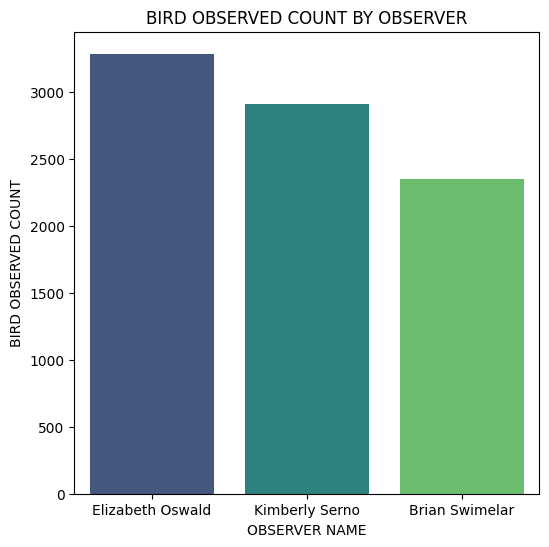

In [28]:
plt.figure(figsize=(6,6))
sns.countplot(x="Observer",data=combined_forest_df,palette='viridis') 
plt.title("BIRD OBSERVED COUNT BY OBSERVER")
plt.xlabel("OBSERVER NAME")
plt.ylabel("BIRD OBSERVED COUNT")
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_3556\2472050799.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="ID_Method",data=combined_forest_df,palette='viridis')


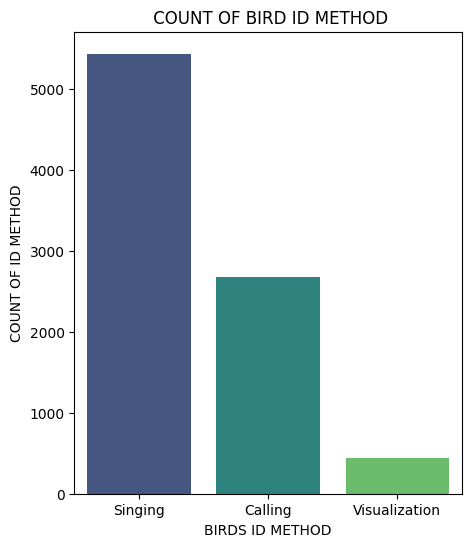

In [29]:
plt.figure(figsize=(5, 6))
sns.countplot(x="ID_Method",data=combined_forest_df,palette='viridis') 
plt.title(" COUNT OF BIRD ID METHOD")
plt.xlabel("BIRDS ID METHOD")
plt.ylabel("COUNT OF ID METHOD")
plt.show()

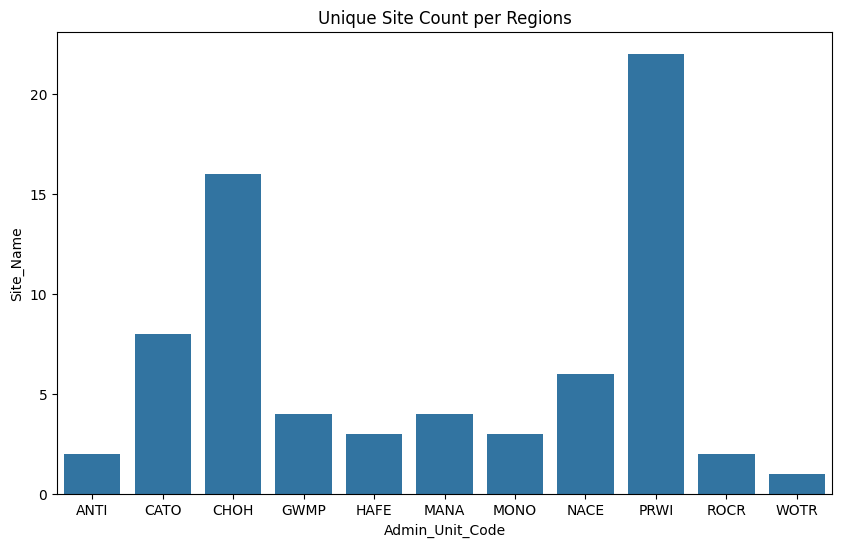

In [30]:
unique_sites = combined_forest_df.groupby("Admin_Unit_Code")["Site_Name"].nunique().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=unique_sites, x="Admin_Unit_Code", y="Site_Name")                   
plt.title("Unique Site Count per Regions")
plt.show()

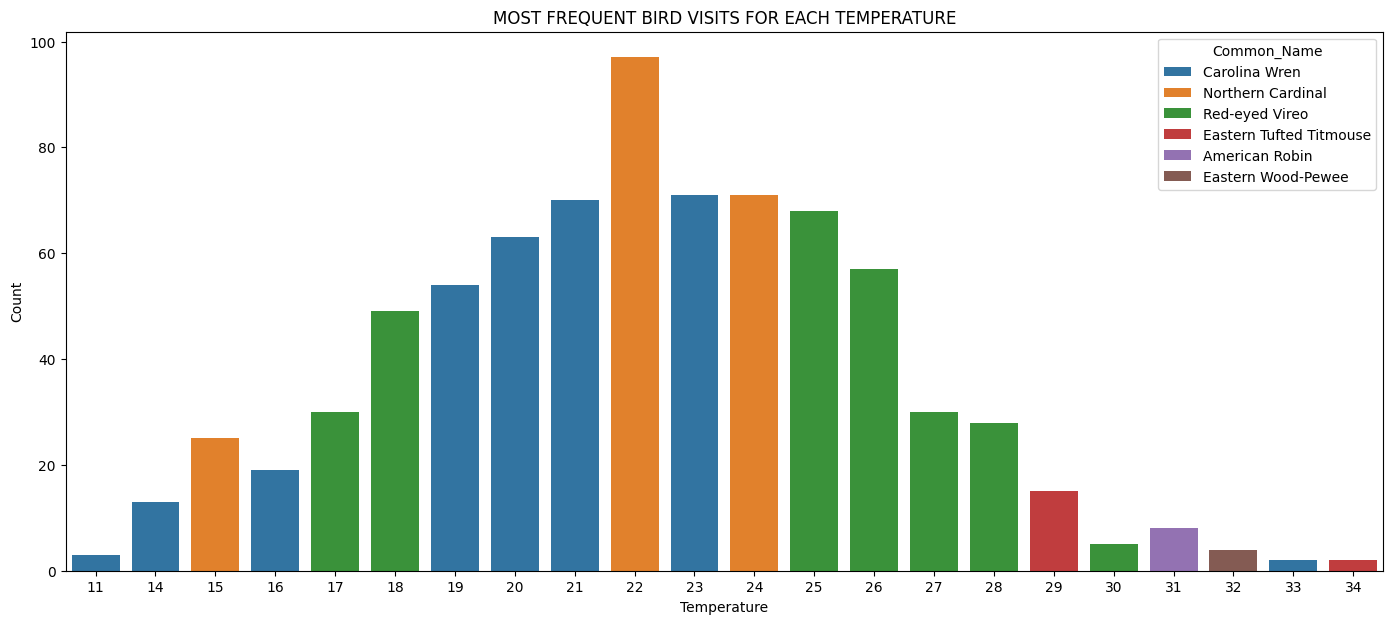

In [31]:
bird_counts = combined_forest_df.groupby(["Temperature", "Common_Name"]).size().reset_index(name="Count")
most_visited_bird = bird_counts.loc[bird_counts.groupby("Temperature")["Count"].idxmax()]
plt.figure(figsize=(17,7))
sns.barplot(data=most_visited_bird, x="Temperature", y="Count", hue="Common_Name")
plt.title("MOST FREQUENT BIRD VISITS FOR EACH TEMPERATURE")
plt.show()

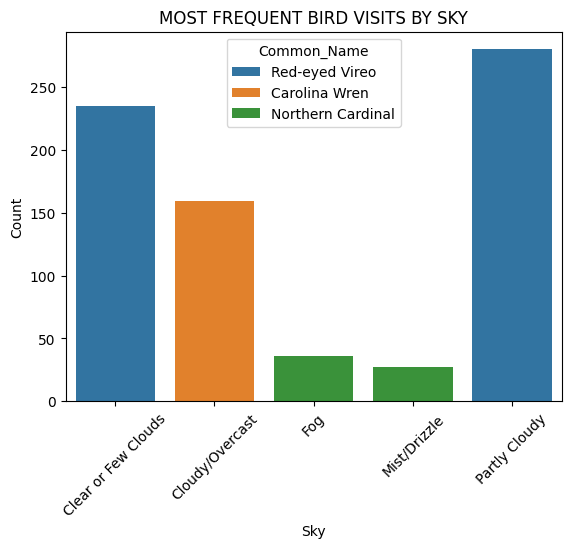

In [32]:
#DISPLAY THE MOSTED VISITED BIRD BY SKY 
bird_count_by_sky = combined_forest_df.groupby(["Sky", "Common_Name"]).size().reset_index(name="Count")
bird_count_by_sky_max = bird_count_by_sky.loc[bird_count_by_sky.groupby("Sky")["Count"].idxmax()]
sns.barplot(data=bird_count_by_sky_max , x="Sky", y="Count", hue="Common_Name")
plt.title("MOST FREQUENT BIRD VISITS BY SKY")
plt.xticks(rotation=45)
plt.show()

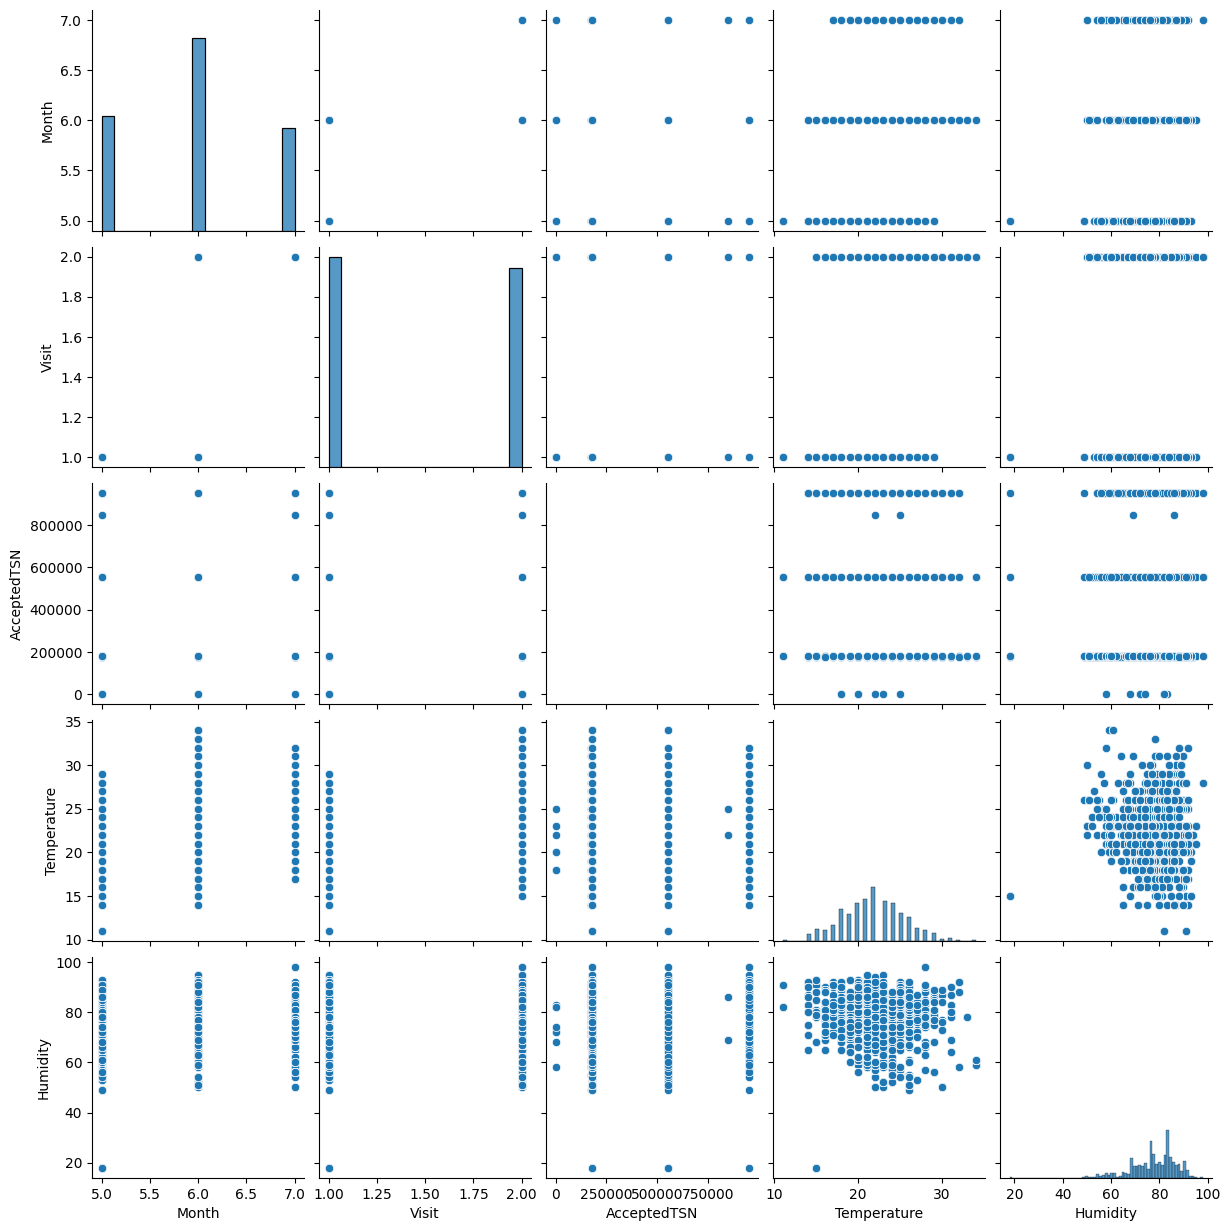

In [33]:
numeric_columns = ['Month', 'Visit', 'AcceptedTSN','Temperature','Humidity']
filtered_data = combined_forest_df[numeric_columns]
sns.pairplot(filtered_data)
plt.show()